In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

%matplotlib inline

### Data Acquisition

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentimen_tayangan_tv.csv')
df.head()

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


In [3]:
df.tail()

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
395,396,negative,MataNajwaMetroTV,0,ini apa banget deh gw paling kesel klo orang2 ...
396,397,negative,MataNajwaMetroTV,0,Orang miskin semakin miskin klo sekolah melaku...
397,398,negative,MataNajwaMetroTV,0,"ga boLeh emosi, cepat tua, nonton #matanajwame..."
398,399,negative,MataNajwaMetroTV,0,dr penampilan saja kyk preman taunya bkin kisr...
399,400,negative,MataNajwaMetroTV,0,Jawab aja ga usah berbelit-belit. Muter2 ga je...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              400 non-null    int64 
 1   Sentiment       400 non-null    object
 2   Acara TV        400 non-null    object
 3   Jumlah Retweet  400 non-null    int64 
 4   Text Tweet      400 non-null    object
dtypes: int64(2), object(3)
memory usage: 15.8+ KB


In [5]:
len(df)

400

In [6]:
df['Sentiment'].value_counts()

Sentiment
positive    200
negative    200
Name: count, dtype: int64

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Sentiment', ylabel='count'>

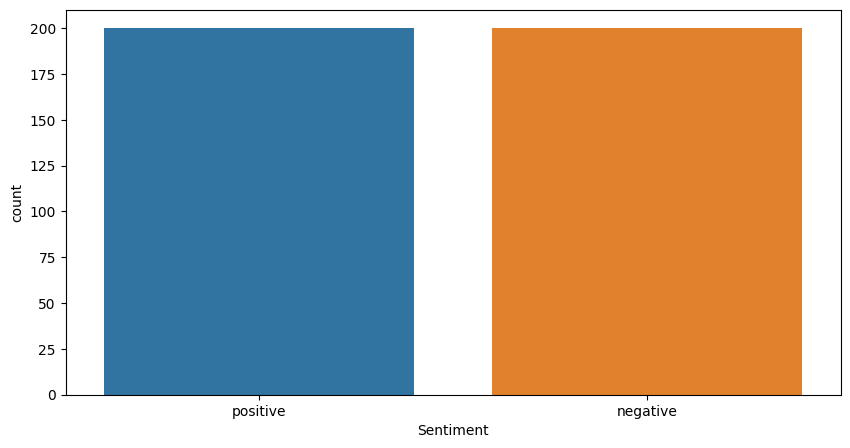

In [7]:
import seaborn as sns

plt.figure(figsize=(10,5))

sns.countplot(x='Sentiment', data=df)

### Data Preprocessing

In [8]:
df.columns

Index(['Id', 'Sentiment', 'Acara TV', 'Jumlah Retweet', 'Text Tweet'], dtype='object')

In [9]:
df.rename(columns={
    'Id': 'id',
    'Sentiment': 'sentiment',
    'Acara TV': 'acara_tv',
    'Jumlah Retweet': 'jumlah_retweet',
    'Text Tweet': 'text_tweet',
}, inplace=True)

df.head()

,id,sentiment,acara_tv,jumlah_retweet,text_tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


In [10]:
raw_sample = ' '.join(df['text_tweet'].iloc[:10])
raw_sample

'Undang @N_ShaniJKT48 ke hitamputih, pemenang SSK JKT48 harusnya mJKT48 ini lebih Layak di Undang karena prestasinya Selamat berbuka puasa Semoga amal ibadah hari ni diterima Allah #hitamputih Ada nih di trans7 hitam putih, dia dpt penghargaan juga di norwegia #hitamputih selamat ya mas @adietaufan masuk hitamputih Asiknya nonton Hitam Putih Trans7 @TRANS7 acara paling komplit dan menarik apalagi ada hitam putih hitam putih T7 inspiratif banget Suka banget dengan acara hitam putih Keren lu bro #HitamPutihTrans7 Tadi ada yg liat hitam putih di trans7 ga, Ada sanggu ganteng'

##### Case Folding

In [11]:
import re

def caseFolding(text):
    text = text.lower()
    # delete url
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # delete acount tag
    text = re.sub(r'@\S+', '', text)
    # delete hashtag
    text = re.sub(r'#\S+', '', text)
    # delete number
    text = re.sub(r'\d+', '', text)
    # delete punctuation
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()
    return text

ori_sample = str(raw_sample)
raw_sample = caseFolding(raw_sample)
print(f'Original: {ori_sample}\n')
print('Case Folding: ', raw_sample)

Original: Undang @N_ShaniJKT48 ke hitamputih, pemenang SSK JKT48 harusnya mJKT48 ini lebih Layak di Undang karena prestasinya Selamat berbuka puasa Semoga amal ibadah hari ni diterima Allah #hitamputih Ada nih di trans7 hitam putih, dia dpt penghargaan juga di norwegia #hitamputih selamat ya mas @adietaufan masuk hitamputih Asiknya nonton Hitam Putih Trans7 @TRANS7 acara paling komplit dan menarik apalagi ada hitam putih hitam putih T7 inspiratif banget Suka banget dengan acara hitam putih Keren lu bro #HitamPutihTrans7 Tadi ada yg liat hitam putih di trans7 ga, Ada sanggu ganteng

Case Folding:  undang  ke hitamputih pemenang ssk jkt harusnya mjkt ini lebih layak di undang karena prestasinya selamat berbuka puasa semoga amal ibadah hari ni diterima allah  ada nih di trans hitam putih dia dpt penghargaan juga di norwegia  selamat ya mas  masuk hitamputih asiknya nonton hitam putih trans  acara paling komplit dan menarik apalagi ada hitam putih hitam putih t inspiratif banget suka bange

##### Word Normalization

In [12]:
key_norm = pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')

key_norm.columns

Index(['_id', 'singkat', 'hasil'], dtype='object')

In [13]:
def normalize(text):
    text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
    return text

raw_sample = normalize(raw_sample)
print(f'Original: {ori_sample}\n')
print(f'After Normalization: {normalize(raw_sample)}')

Original: Undang @N_ShaniJKT48 ke hitamputih, pemenang SSK JKT48 harusnya mJKT48 ini lebih Layak di Undang karena prestasinya Selamat berbuka puasa Semoga amal ibadah hari ni diterima Allah #hitamputih Ada nih di trans7 hitam putih, dia dpt penghargaan juga di norwegia #hitamputih selamat ya mas @adietaufan masuk hitamputih Asiknya nonton Hitam Putih Trans7 @TRANS7 acara paling komplit dan menarik apalagi ada hitam putih hitam putih T7 inspiratif banget Suka banget dengan acara hitam putih Keren lu bro #HitamPutihTrans7 Tadi ada yg liat hitam putih di trans7 ga, Ada sanggu ganteng

After Normalization: undang ke hitamputih pemenang ssk Jakarta harusnya mjkt ini lebih layak di undang karena prestasinya selamat berbuka puasa semoga amal ibadah hari ni diterima allah ada nih di trans hitam putih dia dapat penghargaan juga di norwegia selamat ya mas masuk hitamputih asiknya nonton hitam putih trans acara paling komplit dan menarik apalagi ada hitam putih hitam putih t inspiratif banget suk

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

stopwords = stopwords.words('indonesian')
print(len(stopwords))

# stopwords more optional
more_stopword = []

stopwords.extend(more_stopword)


758


In [15]:
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

raw_sample = remove_stopwords(raw_sample)
print(f'Original: {ori_sample}\n')
print(f'After Remove Stopwords: {raw_sample}')

Original: Undang @N_ShaniJKT48 ke hitamputih, pemenang SSK JKT48 harusnya mJKT48 ini lebih Layak di Undang karena prestasinya Selamat berbuka puasa Semoga amal ibadah hari ni diterima Allah #hitamputih Ada nih di trans7 hitam putih, dia dpt penghargaan juga di norwegia #hitamputih selamat ya mas @adietaufan masuk hitamputih Asiknya nonton Hitam Putih Trans7 @TRANS7 acara paling komplit dan menarik apalagi ada hitam putih hitam putih T7 inspiratif banget Suka banget dengan acara hitam putih Keren lu bro #HitamPutihTrans7 Tadi ada yg liat hitam putih di trans7 ga, Ada sanggu ganteng

After Remove Stopwords: undang hitamputih pemenang ssk Jakarta mjkt layak undang prestasinya selamat berbuka puasa semoga amal ibadah ni diterima allah nih trans hitam putih penghargaan norwegia selamat ya mas masuk hitamputih asiknya nonton hitam putih trans acara komplit menarik hitam putih hitam putih t inspiratif banget suka banget acara hitam putih keren bro lihat hitam putih trans sanggu ganteng


### Stemming

In [16]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    text = stemmer.stem(text)
    return text

raw_sample = stemming(raw_sample)

print(f'Original: {ori_sample}\n')
print(f'After Stemming: {raw_sample}')

Original: Undang @N_ShaniJKT48 ke hitamputih, pemenang SSK JKT48 harusnya mJKT48 ini lebih Layak di Undang karena prestasinya Selamat berbuka puasa Semoga amal ibadah hari ni diterima Allah #hitamputih Ada nih di trans7 hitam putih, dia dpt penghargaan juga di norwegia #hitamputih selamat ya mas @adietaufan masuk hitamputih Asiknya nonton Hitam Putih Trans7 @TRANS7 acara paling komplit dan menarik apalagi ada hitam putih hitam putih T7 inspiratif banget Suka banget dengan acara hitam putih Keren lu bro #HitamPutihTrans7 Tadi ada yg liat hitam putih di trans7 ga, Ada sanggu ganteng

After Stemming: undang hitamputih menang ssk jakarta mjkt layak undang prestasi selamat buka puasa moga amal ibadah ni terima allah nih trans hitam putih harga norwegia selamat ya mas masuk hitamputih asiknya nonton hitam putih trans acara komplit tarik hitam putih hitam putih t inspiratif banget suka banget acara hitam putih keren bro lihat hitam putih trans sanggu ganteng


### Removing no vowels

In [17]:
def delete_no_vowel(text):
    text = ' '.join([word for word in text.split() if word not in ['a', 'i', 'u', 'e', 'o']])
    return text

raw_sample = delete_no_vowel(raw_sample)

print(f'Original: {ori_sample}\n')
print(f'After Delete No Vowel: {raw_sample}')

Original: Undang @N_ShaniJKT48 ke hitamputih, pemenang SSK JKT48 harusnya mJKT48 ini lebih Layak di Undang karena prestasinya Selamat berbuka puasa Semoga amal ibadah hari ni diterima Allah #hitamputih Ada nih di trans7 hitam putih, dia dpt penghargaan juga di norwegia #hitamputih selamat ya mas @adietaufan masuk hitamputih Asiknya nonton Hitam Putih Trans7 @TRANS7 acara paling komplit dan menarik apalagi ada hitam putih hitam putih T7 inspiratif banget Suka banget dengan acara hitam putih Keren lu bro #HitamPutihTrans7 Tadi ada yg liat hitam putih di trans7 ga, Ada sanggu ganteng

After Delete No Vowel: undang hitamputih menang ssk jakarta mjkt layak undang prestasi selamat buka puasa moga amal ibadah ni terima allah nih trans hitam putih harga norwegia selamat ya mas masuk hitamputih asiknya nonton hitam putih trans acara komplit tarik hitam putih hitam putih t inspiratif banget suka banget acara hitam putih keren bro lihat hitam putih trans sanggu ganteng


### Pipeline

In [18]:
def preprocessing(text):
    text = caseFolding(text)
    text = normalize(text)
    text = remove_stopwords(text)
    text = stemming(text)
    # text = delete_no_vowel(text)
    return text

In [19]:
%%time 
df['clean_text'] = df['text_tweet'].apply(preprocessing)

CPU times: user 46.6 s, sys: 72.9 ms, total: 46.7 s
Wall time: 49.3 s


In [20]:
df

,id,sentiment,acara_tv,jumlah_retweet,text_tweet,clean_text
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang hitamputih menang ssk jakarta mjkt laya...
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat buka puasa moga amal ibadah ni terima ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar...",nih trans hitam putih harga norwegia
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans
...,...,...,...,...,...,...
395,396,negative,MataNajwaMetroTV,0,ini apa banget deh gw paling kesel klo orang2 ...,banget deh kesel orang debat pakai emosi
396,397,negative,MataNajwaMetroTV,0,Orang miskin semakin miskin klo sekolah melaku...,orang miskin miskin sekolah pungut liar
397,398,negative,MataNajwaMetroTV,0,"ga boLeh emosi, cepat tua, nonton #matanajwame...",emosi cepat tua nonton lihat emosi bicara
398,399,negative,MataNajwaMetroTV,0,dr penampilan saja kyk preman taunya bkin kisr...,tampil preman tau bkin kisruh usak


In [21]:
df.to_csv('clean_data_tweet.csv', index=False)

### Feature Engineering

In [22]:
df = pd.read_csv('clean_data_tweet.csv')
df.head()

,id,sentiment,acara_tv,jumlah_retweet,text_tweet,clean_text
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang hitamputih menang ssk jakarta mjkt laya...
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat buka puasa moga amal ibadah ni terima ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar...",nih trans hitam putih harga norwegia
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans


In [23]:
X = df['clean_text']
y = df['sentiment']

##### Feature Extraction using TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()
tf_idf.fit(X)

TfidfVectorizer()

In [25]:
features = tf_idf.get_feature_names_out()
print(f'length feature: {len(features)}')
print(f'feature: {features[:10]}')

length feature: 1079
feature: ['aa' 'abang' 'abas' 'abi' 'abraham' 'academi' 'acara' 'acung' 'adem'
 'adik']


##### Transform to a vector

In [26]:
X_tf_idf = tf_idf.transform(X).toarray()
print(f'shape: {X_tf_idf.shape}')

shape: (400, 1079)


In [27]:
# save tf_idf  to pickle
data_tf_idf = pd.DataFrame(X_tf_idf, columns=features)

data_tf_idf.head()

,aa,abang,abas,abi,abraham,academi,acara,acung,adem,adik,...,wna,woidjojayanto,ya,yaampun,yadia,yag,younglex,yuk,zaitun,zhonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.379622,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
pickle.dump(X_tf_idf, open('tf_idf.pickle', 'wb'))

##### Feature Selection

In [29]:
data_tf_idf = pickle.load(open('tf_idf.pickle', 'rb'))

In [30]:
X = np.array(data_tf_idf)
y = np.array(y)

In [31]:
from sklearn.feature_selection import SelectKBest, chi2

chi2_selector = SelectKBest(chi2, k=1000)
X_best_features = chi2_selector.fit_transform(X, y)

print(f"Original X shape: {X.shape}")
print(f"Reduced X shape: {X_best_features.shape}")
X_best_features

Original X shape: (400, 1079)
Reduced X shape: (400, 1000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
data_chi2 = pd.DataFrame({'feature': features, 'score': chi2_selector.scores_})

data_chi2.sort_values(by='score', ascending=False).head(10)


,feature,score
477,keren,9.261036
385,inspirasi,7.257482
790,putih,5.001288
844,salut,4.708812
897,seru,4.138241
358,hitam,4.086399
160,bodoh,3.607858
1010,trans,3.532650
558,malam,3.428211
628,moga,3.277166


In [33]:
# delete feature with get support
mask = chi2_selector.get_support()

new_features = []

for bool, feature in zip(mask, features):
    if bool:
        new_features.append(feature)

print(f'length feature: {len(new_features)}')
print(f'feature: {new_features[:10]}')

length feature: 1000
feature: ['aa', 'abang', 'abas', 'abi', 'abraham', 'academi', 'acara', 'acung', 'adem', 'adik']


In [34]:
# save new feature to pickle
best_features = {}

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in new_features:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    best_features[k] = v 


In [35]:
pickle.dump(best_features, open('best_feature.pickle', 'wb'))

### Model Building

In [36]:
# load data final
df_ff = pickle.load(open('best_feature.pickle', 'rb'))


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_best_features, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 1000), (80, 1000), (320,), (80,))

In [39]:
# model with knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [40]:
model_pred = knn.predict(X_test)
model_pred

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positi

In [41]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.32350771],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Model Evaluation

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f"True: {(model_pred == y_test).sum()}")
print(f"False: {(model_pred != y_test).sum()}")
print(f"Accuracy: {accuracy_score(y_test, model_pred)}")

True: 43
False: 37
Accuracy: 0.5375


<Axes: >

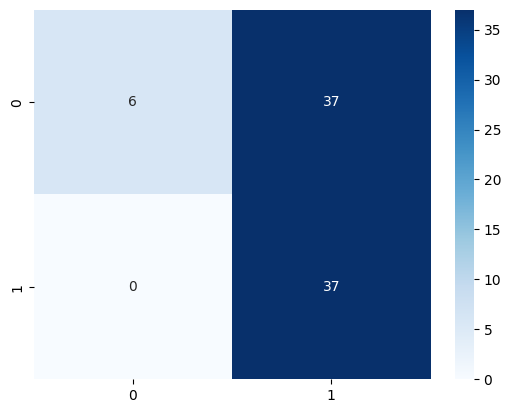

In [43]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, model_pred), annot=True, fmt='d', cmap='Blues')

In [44]:
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

    negative       1.00      0.14      0.24        43
    positive       0.50      1.00      0.67        37

    accuracy                           0.54        80
   macro avg       0.75      0.57      0.46        80
weighted avg       0.77      0.54      0.44        80



In [45]:
# cross validation
from sklearn.model_selection import cross_val_score, ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cv_accuracy = cross_val_score(knn, X_best_features, y, cv=cv, scoring='accuracy')
avg_accuracy = cv_accuracy.mean()

print(f"All Accuracy: {cv_accuracy}")
print(f"Accuracy: {avg_accuracy}")

All Accuracy: [0.5375 0.6    0.675  0.5375 0.725 ]
Accuracy: 0.615


### Simple Deployment

In [47]:
input_data = "hitam putih tidak cocok"

pre_input = preprocessing(input_data)
tf_idf_vec = TfidfVectorizer(vocabulary=set(best_features))


result = knn.predict(tf_idf_vec.fit_transform([pre_input]))

# print(f"Input: {input_data}")
print(f"Text: {pre_input}\nPrediksi: {result}")

Text: hitam putih cocok
Prediksi: ['positive']
